In [30]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [19]:
# Read the california sample csv and store in data frame
ca_df = pd.read_csv('california_sample.csv')
ca_df.head()

,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,No_Exit,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day
0,1901925,A-1901926,2,2020-11-17 17:12:00,39.930742,-123.763228,Incident on US-101 NB near HOUSE 10069 Expect ...,Piercy,Mendocino,CA,...,False,False,False,False,Night,2020-11-17,17:12:00,2020,11,17
1,351751,A-351752,2,2021-03-26 13:56:24,34.021157,-118.477548,Stationary traffic on I-10 W - Santa Monica Fw...,Santa Monica,Los Angeles,CA,...,False,False,False,False,Day,2021-03-26,13:56:24,2021,3,26
2,1991543,A-1991544,2,2020-10-29 12:15:30,34.199362,-118.396519,Stationary traffic from Vose St to CA-170 N du...,North Hollywood,Los Angeles,CA,...,False,False,False,False,Day,2020-10-29,12:15:30,2020,10,29
3,1744181,A-1744182,2,2020-11-06 18:15:30,36.684873,-119.749592,Slow traffic on CA-99 from Central Ave (CA-99)...,Fresno,Fresno,CA,...,False,False,False,False,Night,2020-11-06,18:15:30,2020,11,6
4,1612021,A-1612022,2,2021-02-27 11:21:00,39.796584,-123.266931,Accident from Tabor Ln to Tabor Ln / Pomo Trl.,Covelo,Mendocino,CA,...,False,False,False,False,Day,2021-02-27,11:21:00,2021,2,27


In [20]:
# Read the dst file that contains the exact day light saving time date and categories, and store in a data frame
dst_df = pd.read_csv('DST_CA_buckets.csv')
dst_df.head()

,GroupName,State,tz,DST_Flag,Change_YR,Change_Mo,Change_Day,Change_DT
0,CA_DST_on,CA,Pacific,DST_on_PRE,2015,2,26,2/26/2015
1,CA_DST_on,CA,Pacific,DST_on_PRE,2015,2,27,2/27/2015
2,CA_DST_on,CA,Pacific,DST_on_PRE,2015,2,28,2/28/2015
3,CA_DST_on,CA,Pacific,DST_on_PRE,2015,3,1,3/1/2015
4,CA_DST_on,CA,Pacific,DST_on_PRE,2015,3,2,3/2/2015


In [21]:
# change the column names of dst_ca_df to match with ca_df
dst_df.rename(columns= {'Change_Mo': 'month', 'Change_YR': 'year', 'Change_Day': 'day'}, inplace = True)

# get rid of the columns in dst_ca_df unnecessary for merging
dst_cleaned = dst_df[['DST_Flag', 'year', 'month', 'day']]

In [22]:
merge_ca_df = ca_df.merge(dst_cleaned, how = 'inner', on = ['year', 'month', 'day'])
merge_ca_df.head()

,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day,DST_Flag
0,1991543,A-1991544,2,2020-10-29 12:15:30,34.199362,-118.396519,Stationary traffic from Vose St to CA-170 N du...,North Hollywood,Los Angeles,CA,...,False,False,False,Day,2020-10-29,12:15:30,2020,10,29,DST_off_PRE
1,1993694,A-1993695,2,2020-10-29 15:23:00,37.690634,-122.127049,Stationary traffic on I-238 from I-880 (I-238)...,San Lorenzo,Alameda,CA,...,False,False,False,Day,2020-10-29,15:23:00,2020,10,29,DST_off_PRE
2,2025579,A-2025580,2,2020-10-29 20:17:00,34.065975,-117.507280,I10 W EO ETIWANDA AVE. [Rotation Request Comme...,Fontana,San Bernardino,CA,...,False,False,False,Night,2020-10-29,20:17:00,2020,10,29,DST_off_PRE
3,1831835,A-1831836,2,2020-10-29 22:59:00,32.896231,-117.115792,Incident on I-15 NB near MIRAMAR RD Expect del...,San Diego,San Diego,CA,...,False,False,False,Night,2020-10-29,22:59:00,2020,10,29,DST_off_PRE
4,1891858,A-1891859,2,2020-10-29 20:08:30,33.994477,-117.911249,Slow traffic on CA-60 from Fullerton Rd (CA-60...,Rowland Heights,Los Angeles,CA,...,False,False,False,Night,2020-10-29,20:08:30,2020,10,29,DST_off_PRE


In [23]:
# Repeat the above steps on Arizona sample csv
az_df = pd.read_csv('arizona_sample.csv')
merge_az_df = az_df.merge(dst_cleaned, how = 'inner', on = ['year', 'month', 'day'])
merge_az_df.head()




,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day,DST_Flag
0,2455631,A-2455632,2,2019-11-12 13:12:36,33.45918,-112.00539,At 32nd St/Exit 1C - Accident. Lane blocked.,Phoenix,Maricopa,AZ,...,False,False,False,Day,2019-11-12,13:12:36,2019,11,12,DST_off_POST
1,2455633,A-2455634,4,2019-11-12 19:22:19,33.21919,-111.72038,Closed between Higley Rd and Riggs Rd - Road c...,Queen Creek,Maricopa,AZ,...,False,False,True,Night,2019-11-12,19:22:19,2019,11,12,DST_off_POST
2,2455624,A-2455625,2,2019-11-12 08:03:37,33.40362,-111.96781,At Broadway Rd/52nd St/Exit 153B - Accident. L...,Tempe,Maricopa,AZ,...,False,False,False,Day,2019-11-12,08:03:37,2019,11,12,DST_off_POST
3,2455623,A-2455624,2,2019-11-12 06:35:04,33.46121,-112.08822,At 7th Ave/Exit 144 - Accident. Lane blocked.,Phoenix,Maricopa,AZ,...,False,False,False,Night,2019-11-12,06:35:04,2019,11,12,DST_off_POST
4,2455634,A-2455635,4,2019-11-12 19:22:19,33.21937,-111.71486,Closed at Higley Rd - Road closed due to accid...,Gilbert,Maricopa,AZ,...,False,True,False,Night,2019-11-12,19:22:19,2019,11,12,DST_off_POST


In [129]:
# Concatenate the California dataframe and Arizona data frame into one
frames = [merge_az_df, merge_ca_df]
complete_df = pd.concat(frames)
complete_df
complete_df.columns
complete_df.describe()



,Unnamed: 0,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),year,month,day
count,4.074600e+04,40746.000000,40746.000000,40746.000000,39382.000000,34659.000000,39322.000000,39642.000000,39653.000000,38336.000000,32733.000000,40746.000000,40746.000000,40746.000000
mean,1.568969e+06,2.054361,35.261743,-118.311742,62.705716,62.089206,54.286023,29.381089,8.931393,5.426959,0.002959,2019.956217,8.172900,12.893413
std,7.992744e+05,0.295447,2.137061,3.225973,12.049578,12.733141,26.916695,1.042357,3.110715,4.895527,0.019389,1.214304,3.665813,9.100360
min,9.259300e+04,2.000000,31.337170,-124.349517,-5.100000,-10.000000,1.000000,22.820000,0.000000,0.000000,0.000000,2016.000000,2.000000,1.000000
25%,8.544572e+05,2.000000,33.854404,-121.261306,55.000000,54.000000,30.000000,29.060000,10.000000,0.000000,0.000000,2019.000000,3.000000,6.000000
50%,1.809038e+06,2.000000,34.118496,-118.248952,62.000000,61.000000,57.000000,29.830000,10.000000,5.000000,0.000000,2020.000000,10.000000,10.000000
75%,2.287806e+06,2.000000,37.425522,-117.409471,70.000000,70.000000,77.000000,29.980000,10.000000,8.000000,0.000000,2021.000000,11.000000,18.000000
max,2.746858e+06,4.000000,42.005278,-109.054487,102.000000,102.000000,100.000000,30.520000,100.000000,105.000000,0.480000,2021.000000,11.000000,31.000000


In [25]:
type(merge_ca_df['DST_Flag'].unique())

numpy.ndarray

In [66]:
merge_ca_df['Severity'].value_counts()

2    34023
3      557
4      292
Name: Severity, dtype: int64

# Compare Severity

In [130]:
# Grouping the severity by the DST_Flag status.

group0 = merge_ca_df[merge_ca_df["DST_Flag"] == 'DST_off_POST' ]["Severity"]
group1 = merge_ca_df[merge_ca_df["DST_Flag"] == 'DST_off_PRE' ]["Severity"]
group2 = merge_ca_df[merge_ca_df["DST_Flag"] == 'DST_on_POST' ]["Severity"]
group3 = merge_ca_df[merge_ca_df["DST_Flag"] == 'DST_on_PRE' ]["Severity"]

In [32]:
# T test between DST on pre and DST on post, spring, compare the severity.

stats.ttest_ind(group3, group2, equal_var=False)

# No significant diffrence. 

Ttest_indResult(statistic=1.5349062703168423, pvalue=0.12483377481522151)

In [33]:
# T test between DST off pre and DST off post, fall, compare the severity.

stats.ttest_ind(group0, group1, equal_var=False)

# No significant diffrence. 

Ttest_indResult(statistic=-1.3521466694263538, pvalue=0.1763420859618193)

# Compare Frequency

In [56]:
ca_groupby_df = merge_ca_df.groupby('DST_Flag').count()


In [57]:
new_order = ['DST_on_PRE', 'DST_on_POST','DST_off_PRE','DST_off_POST']
ca_groupby_df = ca_groupby_df.reindex(new_order)
ca_groupby_df

,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,No_Exit,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day
DST_Flag,,,,,,,,,,,,,,,,,,,,,
DST_on_PRE,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,...,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849
DST_on_POST,5960,5960,5960,5960,5960,5960,5960,5959,5960,5960,...,5960,5960,5960,5960,5959,5960,5960,5960,5960,5960
DST_off_PRE,10723,10723,10723,10723,10723,10723,10723,10723,10723,10723,...,10723,10723,10723,10723,10723,10723,10723,10723,10723,10723
DST_off_POST,12340,12340,12340,12340,12340,12340,12340,12340,12340,12340,...,12340,12340,12340,12340,12340,12340,12340,12340,12340,12340


Text(0.5, 1.0, 'Total Number of Accidents pre/post DST in Spring and Fall')

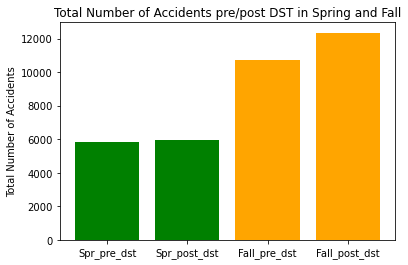

In [97]:
# First we considered the total number of accident for four conditions and plot a bar graph. 
colors = ['g', 'g', 'orange', 'orange']
plt.bar(ca_groupby_df.index, ca_groupby_df['ID'], color = colors)
xticks = ['Spr_pre_dst', 'Spr_post_dst', 'Fall_pre_dst', 'Fall_post_dst']
plt.xticks(np.arange(4), xticks)
plt.ylabel('Total Number of Accidents')
plt.title('Total Number of Accidents pre/post DST in Spring and Fall')


In [121]:
# Only compare the Fall accident number using chi-squre test: 
observed_fall = [10723, 12340]
expected_fall = 11531.5
chi_df_fall = pd.DataFrame([observed_fall]).T
chi_df_fall[1] = expected_fall
chi_df_fall.columns = ["observed_fall", "expected_fall"]
chi_df_fall

critical_value_fall = stats.chi2.ppf(q = 0.95, df = 1)
critical_value_fall

3.841458820694124

In [122]:
stats.chisquare(chi_df_fall['observed_fall'], chi_df_fall['expected_fall'])

# Since the chi square value of 113.37 exceeds the critical value of 3.841, we conclude that the results are statistically significant.

Power_divergenceResult(statistic=113.37159085981875, pvalue=1.788998918858161e-26)

In [124]:
# Only compare the Fall accident number using chi-squre test: 
observed_spring = [5849, 5960]
expected_spring = 5904.5
chi_df_spring = pd.DataFrame([observed_spring]).T
chi_df_spring[1] = expected_spring
chi_df_spring.columns = ["observed_spring", "expected_spring"]
chi_df_spring

critical_value_spring = stats.chi2.ppf(q = 0.95, df = 1)
critical_value_spring

3.841458820694124

In [127]:
stats.chisquare(chi_df_spring['observed_spring'], chi_df_spring['expected_spring'])

# Since the chi square value of 1.0433 smaller than the critical value of 3.841, we conclude that the results are not statistically significant.

Power_divergenceResult(statistic=1.0433567617918538, pvalue=0.3070420610233171)

Text(0.5, 1.0, 'Number of Level 4 Severity Accidents pre/post DST in Spring and Fall')

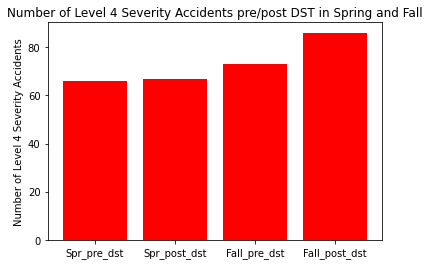

In [102]:
# count how many sever accidents across four groups, we consider the highest level of severity = 4. 
sev_count = merge_ca_df[merge_ca_df['Severity'] == 4]['DST_Flag'].value_counts()
sev_count = sev_count.reindex(new_order)
plt.xticks(np.arange(4), xticks)
plt.bar(sev_count.index, sev_count, color = 'r')
plt.ylabel('Number of Level 4 Severity Accidents')
plt.title('Number of Level 4 Severity Accidents pre/post DST in Spring and Fall')

In [113]:
# Null Hypothesis: There is no difference in the number of severe (severity = 4) accidents 10 days before daylight savings time change and 10 days after daylight savings time change.   
# Alternate Hypothesis: There is a significant increase in the number of severe (severity = 4) accidents 10 days after a change in daylight savings time versus 10 days before the change.
# we run a chi-sqare test:
expected = sev_count.sum()/4
observed = pd.Series(sev_count)
chi_df = pd.DataFrame([observed]).T
chi_df[1] = expected
chi_df.columns = ["observed", "expected"]
chi_df

,observed,expected
DST_on_PRE,66,73.0
DST_on_POST,67,73.0
DST_off_PRE,73,73.0
DST_off_POST,86,73.0


In [117]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [118]:
# Run the chi square test with stats.chisquare()
stats.chisquare(chi_df['observed'], chi_df['expected'])

# Highest severity

Power_divergenceResult(statistic=3.4794520547945202, pvalue=0.3234369152411728)

# AZ as Control

Text(0.5, 1.0, 'Total Number of Accidents pre/post DST in Spring and Fall')

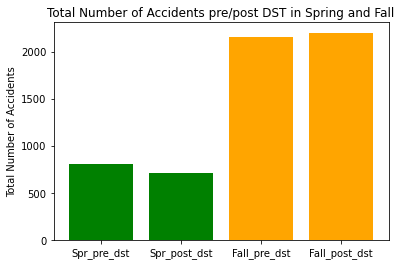

In [131]:
az_groupby_df = merge_az_df.groupby('DST_Flag').count()

new_order = ['DST_on_PRE', 'DST_on_POST','DST_off_PRE','DST_off_POST']
az_groupby_df = az_groupby_df.reindex(new_order)
az_groupby_df

colors = ['g', 'g', 'orange', 'orange']
plt.bar(az_groupby_df.index, az_groupby_df['ID'], color = colors)
xticks = ['Spr_pre_dst', 'Spr_post_dst', 'Fall_pre_dst', 'Fall_post_dst']
plt.xticks(np.arange(4), xticks)
plt.ylabel('Total Number of Accidents')
plt.title('Total Number of Accidents pre/post DST in Spring and Fall')

In [132]:
az_groupby_df

,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,No_Exit,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day
DST_Flag,,,,,,,,,,,,,,,,,,,,,
DST_on_PRE,805,805,805,805,805,805,805,805,805,805,...,805,805,805,805,804,805,805,805,805,805
DST_on_POST,713,713,713,713,713,713,713,713,713,713,...,713,713,713,713,713,713,713,713,713,713
DST_off_PRE,2157,2157,2157,2157,2157,2157,2157,2157,2157,2157,...,2157,2157,2157,2157,2153,2157,2157,2157,2157,2157
DST_off_POST,2199,2199,2199,2199,2199,2199,2199,2199,2199,2199,...,2199,2199,2199,2199,2198,2199,2199,2199,2199,2199


In [133]:
# Only compare the Fall accident in AZ number using chi-squre test: 
observed_fall_az = [2157, 2199]
expected_fall_az = (2157+2199)/2
chi_df_fall_az = pd.DataFrame([observed_fall_az]).T
chi_df_fall_az[1] = expected_fall_az
chi_df_fall_az.columns = ["observed_fall_az", "expected_fall_az"]
chi_df_fall_az

critical_value_fall_az = stats.chi2.ppf(q = 0.95, df = 1)
critical_value_fall_az

3.841458820694124

In [135]:
stats.chisquare(chi_df_fall_az['observed_fall_az'], chi_df_fall_az['expected_fall_az'])

Power_divergenceResult(statistic=0.4049586776859504, pvalue=0.5245394364353129)

In [136]:
# Only compare the Fall accident in AZ number using chi-squre test: 
observed_spring_az = [805, 713]
expected_spring_az = (805+713)/2
chi_df_spring_az = pd.DataFrame([observed_spring_az]).T
chi_df_spring_az[1] = expected_spring_az
chi_df_spring_az.columns = ["observed_spring_az", "expected_spring_az"]
chi_df_spring_az

critical_value_fall_az = stats.chi2.ppf(q = 0.95, df = 1)
critical_value_fall_az

3.841458820694124

In [138]:
stats.chisquare(chi_df_spring_az['observed_spring_az'], chi_df_spring_az['expected_spring_az'])

Power_divergenceResult(statistic=5.575757575757576, pvalue=0.018210785121766562)

# Summary

In [144]:
az_groupby_df['ID']

DST_Flag
DST_on_PRE       805
DST_on_POST      713
DST_off_PRE     2157
DST_off_POST    2199
Name: ID, dtype: int64

In [145]:
ca_groupby_df['ID']

DST_Flag
DST_on_PRE       5849
DST_on_POST      5960
DST_off_PRE     10723
DST_off_POST    12340
Name: ID, dtype: int64

In [147]:
summary_df = pd.DataFrame({
    '# of Accident CA' : ca_groupby_df['ID'],
    '# of Accident AZ' : az_groupby_df['ID']
})


,# of Accident CA,# of Accident AZ
DST_Flag,,
DST_on_PRE,5849,805
DST_on_POST,5960,713
DST_off_PRE,10723,2157
DST_off_POST,12340,2199


In [156]:
percent_change_ca_on = ((5960 - 5849)/5849) * 100
percent_change_ca_off = ((12340 - 10723)/10723) * 100
percent_change_az_on = ((713 - 805)/805) * 100
percent_change_az_off = ((2199 - 2157)/2157) * 100

print(f'Percent change in CA in Spring: {round(percent_change_ca_on,2)}%')
print(f'Percent change in CA in Fall: {round(percent_change_ca_off,2)}%')
print(f'Percent change in AZ in Spring: {round(percent_change_az_on,2)}%')
print(f'Percent change in AZ in Fall: {round(percent_change_az_off,2)}%')

Percent change in CA in Spring: 1.9%
Percent change in CA in Fall: 15.08%
Percent change in AZ in Spring: -11.43%
Percent change in AZ in Fall: 1.95%
